In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import re # Import re module
import ast # Import ast module for literal_eval

In [26]:
# =========================
# LOAD DATA
# =========================
df = pd.read_csv("my_tft_dataset.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

df["win"] = df["win"].astype(int)

In [27]:
# =========================
# SPECIAL TRAITS
# =========================
set4_special = [
    "daredevil","blacksmith","emperor","adept","exile",
    "the boss","mystic"
]

set16_special = [
    "assimilator","blacksmith","caretaker","chainbreaker","chronokeeper",
    "dark child","darkin","dragonborn","emperor","eternal","glutton",
    "harvester","hexmech","rune mage","soulbound","world ender",
    "ascendant","heroic","huntress","immortal","riftscourge",
    "star forger","the boss"
]

# =========================
# TRAIT FILTER FUNCTION
# =========================
def filter_traits(trait_string):
    if not isinstance(trait_string, str):
        return ""

    traits = trait_string.split("; ")
    kept = set()
    for t in traits:
        t_stripped = t.strip()
        if not t_stripped:
            continue

        cleaned_name_prefix = re.sub(r'^TFT\d+_', '', t_stripped, flags=re.IGNORECASE)

        cleaned_name_suffix = re.sub(r'[\(\s]+\d+\)?$', '', cleaned_name_prefix).strip()

        if cleaned_name_suffix and not cleaned_name_suffix.isdigit():
            kept.add(cleaned_name_suffix.title())

    return ", ".join(sorted(list(kept)))


In [28]:
# =========================
# SPLIT SETS
# =========================
set4 = df[df["tft_set_number"] == 4].copy()
set16 = df[df["tft_set_number"] == 16].copy()

# Update calls to filter_traits, removing the allowed_special argument
set4["filtered_traits"] = set4["traits"].apply(lambda x: filter_traits(x))
set16["filtered_traits"] = set16["traits"].apply(lambda x: filter_traits(x))

,Top4,Bottom4,Diff
filtered_traits,,,
Daredevil,0.024691,0.00000,0.024691
Warlord,0.049383,0.02500,0.024383
Boss,0.024691,0.00625,0.018441
Slayer,0.061728,0.04375,0.017978
Dragonsoul,0.061728,0.04375,0.017978
Divine,0.049383,0.03750,0.011883
Emperor,0.006173,0.00000,0.006173
Blacksmith,0.018519,0.01250,0.006019
Vanguard,0.061728,0.05625,0.005478


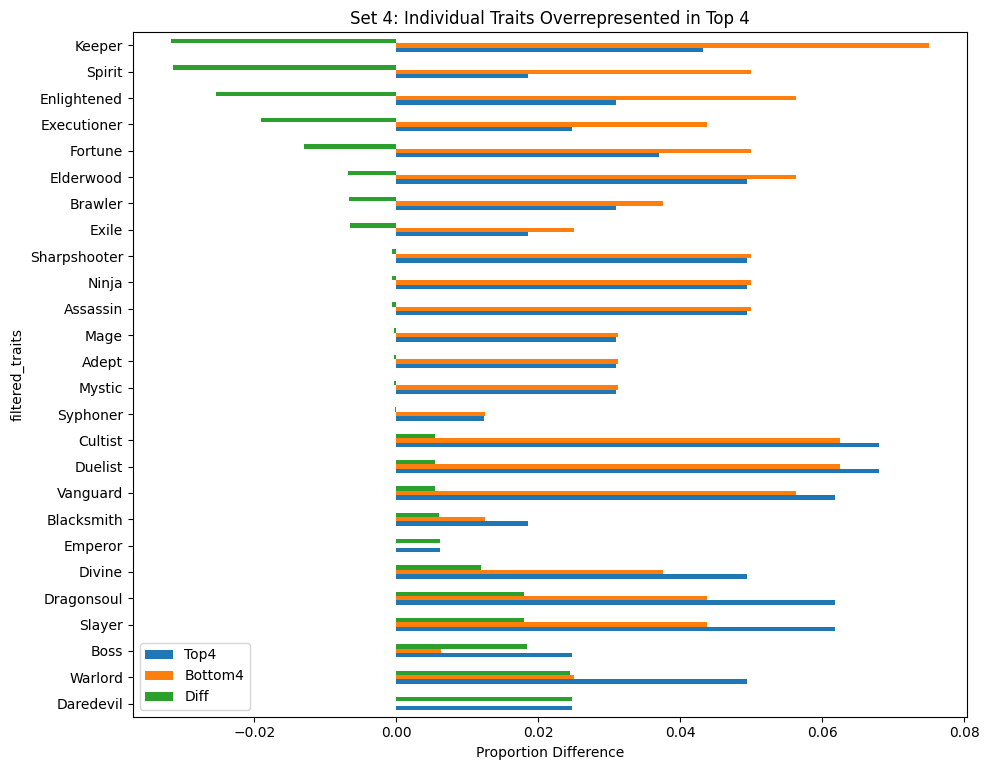

,Top4,Bottom4,Diff
filtered_traits,,,
Theboss,0.020186,0.007692,0.012494
Runemage,0.012422,0.000000,0.012422
Targon,0.020186,0.009615,0.010571
Soulbound,0.012422,0.005769,0.006653
Darkchild,0.006211,0.000000,0.006211
Kindredunique,0.010870,0.005769,0.005100
Yordle,0.043478,0.038462,0.005017
Sylastrait,0.004658,0.000000,0.004658
Xerathunique,0.004658,0.000000,0.004658


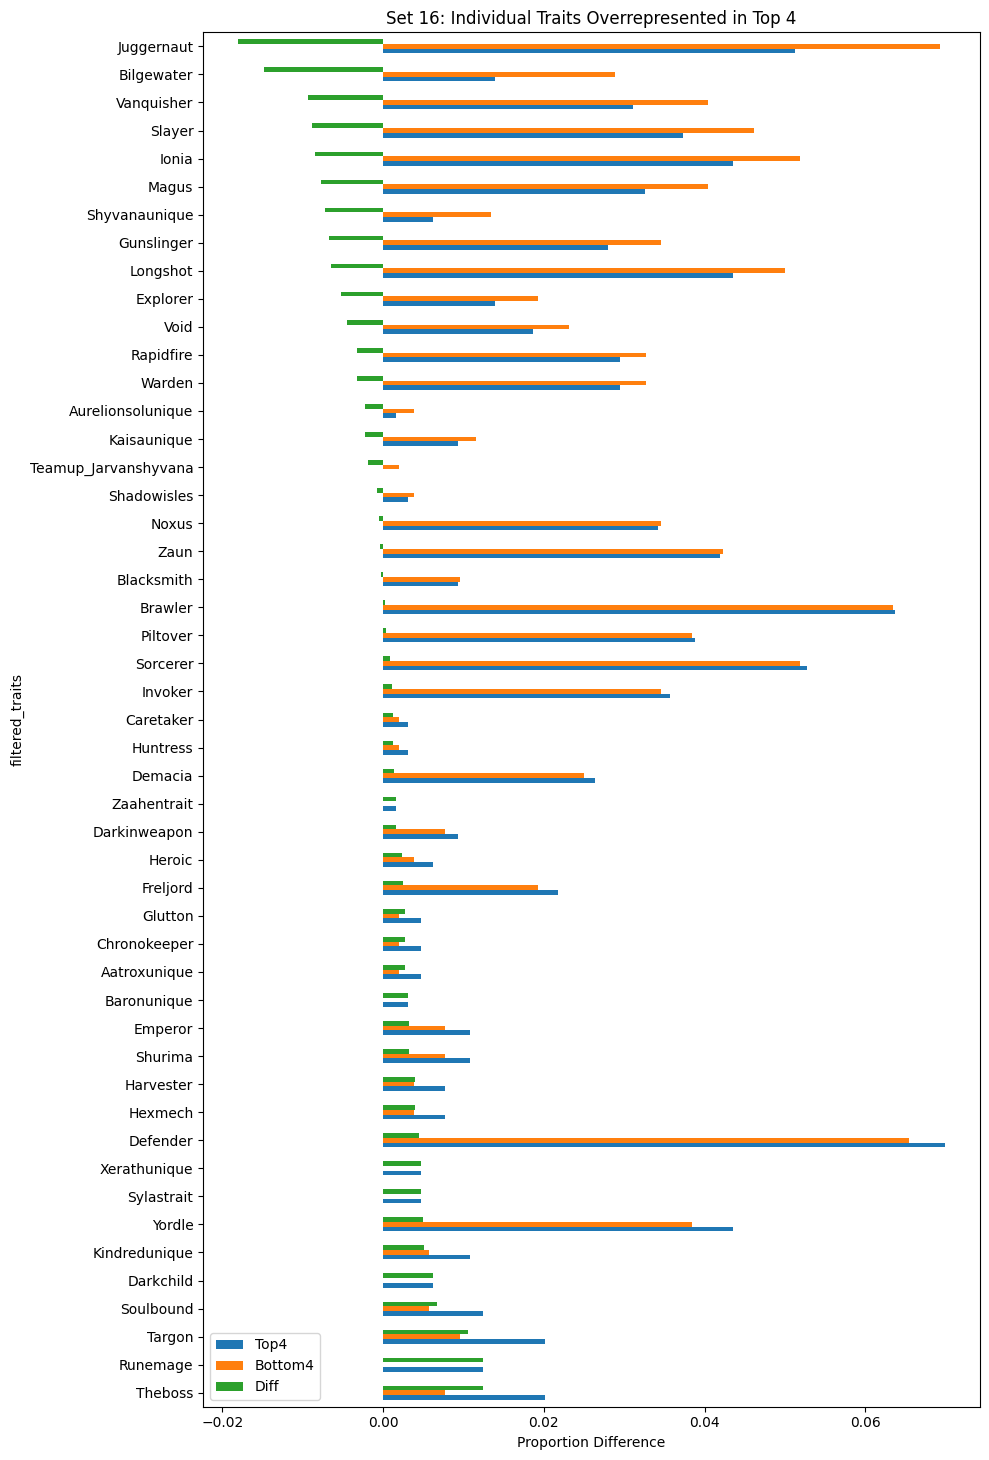

In [29]:
# =========================
# RQ1 — TRAITS VS TOP 4
# =========================
def trait_top4_analysis(data, title):
    top = data[data["placement"] <= 4]
    bottom = data[data["placement"] > 4]

    top_individual_traits = top["filtered_traits"].str.split(', ').explode()
    bottom_individual_traits = bottom["filtered_traits"].str.split(', ').explode()

    top_individual_traits = top_individual_traits[top_individual_traits != '']
    bottom_individual_traits = bottom_individual_traits[bottom_individual_traits != '']

    top_counts = top_individual_traits.value_counts(normalize=True)
    bottom_counts = bottom_individual_traits.value_counts(normalize=True)

    comp = pd.concat([top_counts, bottom_counts], axis=1)
    comp.columns = ["Top4","Bottom4"]
    comp = comp.fillna(0)
    comp["Diff"] = comp["Top4"] - comp["Bottom4"]

    display(comp.sort_values("Diff", ascending=False))

    comp.sort_values("Diff", ascending=False).plot(kind="barh", figsize=(10, max(5, len(comp) * 0.3)))
    plt.title(f"{title}: Individual Traits Overrepresented in Top 4")
    plt.xlabel("Proportion Difference")
    plt.tight_layout()
    plt.show()

trait_top4_analysis(set4, "Set 4")
trait_top4_analysis(set16, "Set 16")

,count
units,
TFT4_Tryndamere,6
TFT4_Aatrox,6
TFT4_Olaf,6
TFT4_Darius,5
TFT4_Pyke,5
TFT4_LeeSin,5
TFT4_Samira,4
TFT4_Sivir,4
TFT4_Ornn,3


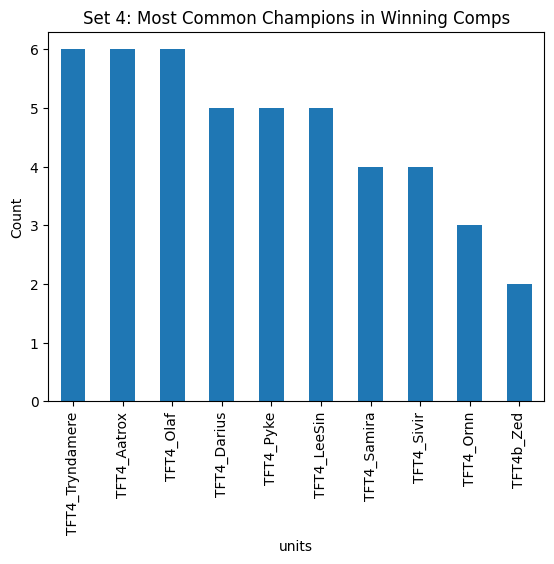

,count
units,
TFT16_Taric,5
TFT16_Sett,4
TFT16_Wukong,4
TFT16_Volibear,4
TFT16_DrMundo,3
TFT16_Ryze,3
TFT16_Garen,3
TFT16_Ziggs,3
TFT16_Caitlyn,3


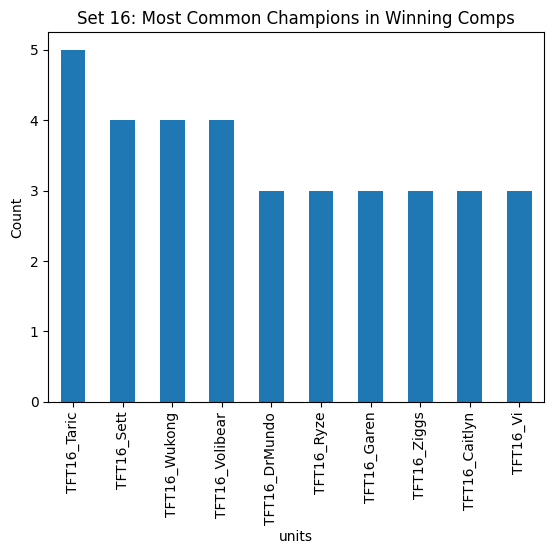

In [30]:
# =========================
# RQ2 — CHAMPIONS IN WINS
# =========================
def champion_win_analysis(data, title):
    wins = data[data["placement"] == 1]
    # Split by semicolon and space, then explode, strip, and remove '[]'
    champs = wins["units"].str.split("; ").explode().str.strip().str.replace(r'[\[\]]', '', regex=True)
    counts = champs.value_counts().head(10)

    display(counts)

    counts.plot(kind="bar")
    plt.title(f"{title}: Most Common Champions in Winning Comps")
    plt.ylabel("Count")
    plt.show()

champion_win_analysis(set4, "Set 4")
champion_win_analysis(set16, "Set 16")

Set 4 Win Mean: 153.1875
Set 4 Loss Mean: 50.705882352941174
t = 7.183272595439614 p = 2.796818120941683e-07


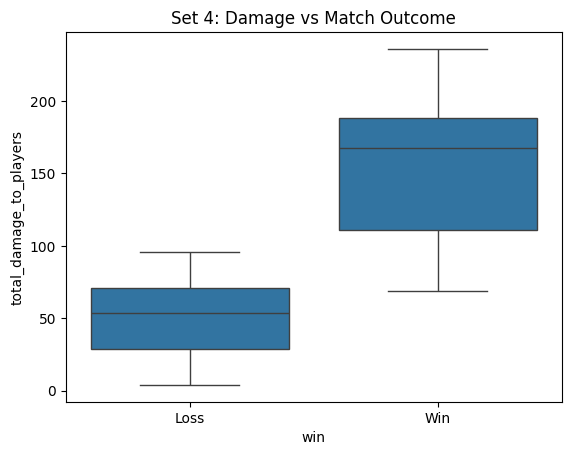

Set 16 Win Mean: 144.20967741935485
Set 16 Loss Mean: 54.61818181818182
t = 12.627256821552717 p = 9.041398735544458e-22


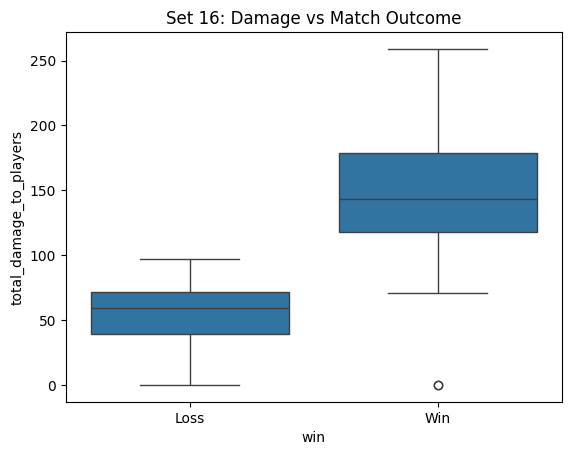

In [31]:
# =========================
# RQ3 — DAMAGE VS WIN
# =========================
def damage_analysis(data, title):
    win_dmg = data[data["win"] == 1]["total_damage_to_players"]
    lose_dmg = data[data["win"] == 0]["total_damage_to_players"]

    print(f"{title} Win Mean:", win_dmg.mean())
    print(f"{title} Loss Mean:", lose_dmg.mean())

    t,p = ttest_ind(win_dmg, lose_dmg, equal_var=False)
    print("t =",t,"p =",p)

    sns.boxplot(x="win", y="total_damage_to_players", data=data)
    plt.xticks([0,1],["Loss","Win"])
    plt.title(f"{title}: Damage vs Match Outcome")
    plt.show()

damage_analysis(set4,"Set 4")
damage_analysis(set16,"Set 16")

All Sets (Set 4 & 16 Combined) Spiritfox Winrate: 0.49056603773584906
All Sets (Set 4 & 16 Combined) Other Winrate: 0.5849056603773585
Chi-square p = 0.4358317800492827


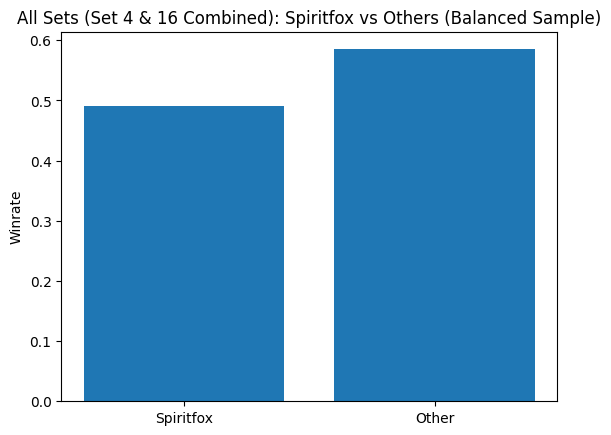

In [32]:
# =========================
# RQ4 — FAIR SPIRITFOX TEST (106 matches)
# =========================
def spiritfox_fair_test(data, title):
    data = data.copy()

    def is_spiritfox_companion(companion_str):
        if not isinstance(companion_str, str):
            return 0 # Not a string, so not Spiritfox
        try:
            companion_dict = ast.literal_eval(companion_str)
            if isinstance(companion_dict, dict) and 'species' in companion_dict:
                return 1 if 'spiritfox' in companion_dict['species'].lower() else 0
        except (ValueError, SyntaxError):
            pass
        return 0

    data["is_spiritfox"] = data["companion"].apply(is_spiritfox_companion)

    sf = data[data["is_spiritfox"] == 1]
    others_data = data[data["is_spiritfox"] == 0]

    if len(sf) == 0:
        print(f"No Spiritfox data found for {title}. Skipping Spiritfox vs Others analysis.")
        return

    if len(others_data) == 0:
        print(f"No non-Spiritfox companion data found for {title}. Skipping Spiritfox vs Others analysis.")
        return

    num_to_sample = min(len(sf), len(others_data))

    if num_to_sample < 1:
        print(f"Insufficient data in either Spiritfox or non-Spiritfox groups to form a balanced comparison for {title}. Skipping analysis.")
        return

    # Sample both groups to the determined size
    sf_sampled = sf.sample(n=num_to_sample, random_state=42)
    non_sampled = others_data.sample(n=num_to_sample, random_state=42)

    fair = pd.concat([sf_sampled, non_sampled])

    if len(fair["is_spiritfox"].unique()) < 2:
        print(f"Balanced sample for {title} does not contain both Spiritfox and other companions. Skipping Chi-square test.")
        # Still print winrates if available
        sf_rate = sf_sampled["win"].mean()
        non_rate = non_sampled["win"].mean()
        print(f"{title} Spiritfox Winrate (sampled):", sf_rate)
        if not pd.isna(sf_rate) and not pd.isna(non_rate):
            plt.bar(["Spiritfox","Other"],[sf_rate, non_rate])
            plt.ylabel("Winrate")
            plt.title(f"{title}: Spiritfox vs Others (Balanced Sample)")
            plt.show()
        return

    sf_rate = sf_sampled["win"].mean()
    non_rate = non_sampled["win"].mean()

    print(f"{title} Spiritfox Winrate:", sf_rate)
    print(f"{title} Other Winrate:", non_rate)

    table = pd.crosstab(fair["is_spiritfox"], fair["win"])


    if table.shape[0] < 2 or table.shape[1] < 2:
        print(f"Contingency table for {title} is degenerate (not at least 2x2). Skipping Chi-square test.")
        plt.bar(["Spiritfox","Other"],[sf_rate, non_rate])
        plt.ylabel("Winrate")
        plt.title(f"{title}: Spiritfox vs Others (Balanced Sample)")
        plt.show()
        return

    chi2,p,_,_ = chi2_contingency(table)
    print("Chi-square p =",p)

    plt.bar(["Spiritfox","Other"],[sf_rate, non_rate])
    plt.ylabel("Winrate")
    plt.title(f"{title}: Spiritfox vs Others (Balanced Sample)")
    plt.show()

all_sets_data = pd.concat([set4, set16], ignore_index=True)
spiritfox_fair_test(all_sets_data, "All Sets (Set 4 & 16 Combined)")